<a href="https://colab.research.google.com/github/syedanida/Neural-Network/blob/main/1_3LayerNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data Generation (Synthetic data for non-linear regression)
np.random.seed(42)

# Generate synthetic data: 3 variables (x1, x2, x3) and corresponding output y
def generate_data(n_samples=100):
    X = np.random.rand(n_samples, 3)  # 3 features (x1, x2, x3)
    y = X[:, 0]**2 + X[:, 1]**2 + X[:, 2]**2  # Non-linear equation
    return X, y

# Generate data
X, y = generate_data()

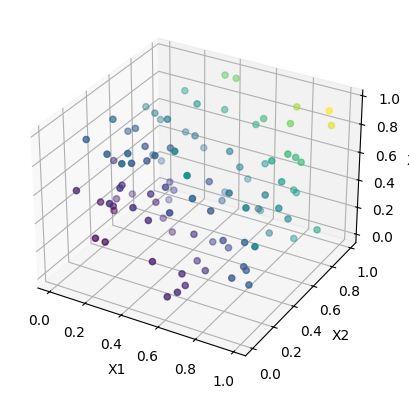

In [3]:
# Visualize the data (optional)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()


In [4]:
# Initialize Neural Network Parameters
input_size = 3  # 3 input features
hidden_size = 5  # Hidden layer size (neurons)
output_size = 1  # Single output for regression

# Randomly initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [5]:
# Define Activation Functions (ReLU and Linear)
def relu(x):
    return np.maximum(0, x)

def linear(x):
    return x

In [10]:
# Forward Propagation
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)  # Activation function for hidden layer
    z2 = np.dot(a1, W2) + b2
    y_pred = linear(z2)  # Linear output layer for regression
    return y_pred, a1

In [15]:
# Loss Function (Mean Squared Error)
def compute_loss(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

In [22]:
def backward(X, y, y_pred, a1, learning_rate=0.01):
    global W1, b1, W2, b2

    m = X.shape[0]  # Number of samples

    # Output layer gradients
    d_loss = 2 * (y_pred - y.reshape(-1,1)) / m  # Gradient of loss with respect to predictions # Reshape to (-1,1) to match y_pred dimension
    d_W2 = np.dot(a1.T, d_loss)  # Gradient of W2
    d_b2 = np.sum(d_loss, axis=0, keepdims=True)  # Gradient of b2

    # Hidden layer gradients (using chain rule)
    d_a1 = np.dot(d_loss, W2.T)  # Gradient of loss w.r.t. a1 (hidden layer activation)
    d_z1 = d_a1 * (a1 > 0)  # Derivative of ReLU activation

    d_W1 = np.dot(X.T, d_z1)  # Gradient of W1
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)  # Gradient of b1

    # Update weights and biases
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2

In [23]:
# Training Loop
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred, a1 = forward(X)

    # Compute loss
    loss = compute_loss(y_pred, y)
    losses.append(loss)

    # Backward pass and update weights
    backward(X, y, y_pred, a1)

    if epoch % 100 == 0:  # Print loss every 100 epochs
        print(f'Epoch {epoch}, Loss: {loss}')


Epoch 0, Loss: 0.9439489594125665
Epoch 100, Loss: 0.3836913570249375
Epoch 200, Loss: 0.4117172550087053
Epoch 300, Loss: 0.44343759239955655
Epoch 400, Loss: 0.48753884701859335
Epoch 500, Loss: 0.5163309846925612
Epoch 600, Loss: 0.5330275021145837
Epoch 700, Loss: 0.5446539205045057
Epoch 800, Loss: 0.5521159822912073
Epoch 900, Loss: 0.5553876804131358


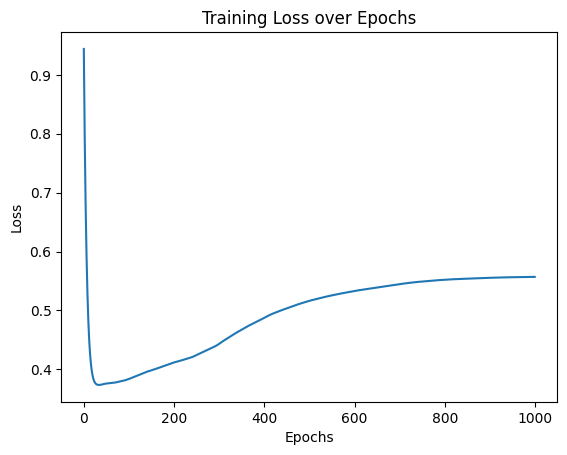

In [24]:
# Final Output
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

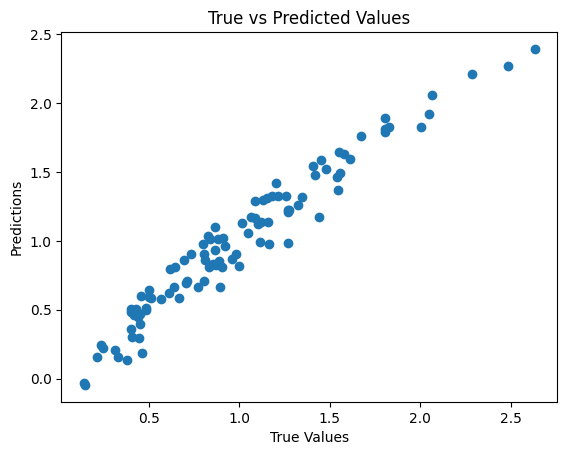

In [25]:
# Final Predictions
y_pred, _ = forward(X)
plt.scatter(y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()